# Testing a 2-step fit for PM memberships

First fit the field, then fit the cluster

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplColors
import matplotlib.cm as cm
from matplotlib import gridspec
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as units
from astropy.modeling import models, fitting
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
from getGaiaData import GaiaClusterMembers

In [3]:
# initial data download (don't need it after the first run, since I've saved the file)
# NGC7789 = GaiaClusterMembers(359.35, 56.7083, 1.3)
# NGC7789.verbose = 1
# NGC7789.getData()
# NGC7789.saveDataToFile('NGC7789_Gaia_r1_3deg.ecsv')
# NGC7789.data

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]
Saving data to file NGC7789_Gaia_r1_3deg.ecsv ... 


source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
1995033650691481088,358.6634564405219,56.51400926622511,-3.104806702372835,-1.3574497839578,--,20.371439,135.62175,--,--,--,--,0.6342298372653512,--,0.9442242,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.008466507,--,--
1995033921272395648,358.6648609128191,56.5412182446351,-0.5065391197993199,-2.7845404868014567,--,19.716822,336.29886,20.332642,16.048517,18.990355,29.51397,-0.25567160271415945,--,1.001384,1,0,20.6252994537354,0.0175369996577501,19.7483997344971,0.0134770004078746,19.3707008361816,0.0243009999394417,19.1343994140625,0.0232469998300076,18.9531002044678,0.0466459989547729,--,--,--,--,--,--,0.0042443974,0.06771088,0.036980826
1995033650697024384,358.69075877576785,56.52166658378837,-3.5062438460355905,-2.8763771675991228,-89.401436,14.409375,4879.1333,14.802567,1041.9901,13.840856,1407.7803,0.654883115775423,5811.375,1.0320119,1,0,14.8816003799438,0.00103799998760223,14.4033002853394,0.00220200000330806,14.2271995544434,0.00454299990087748,14.1450996398926,0.0030749998986721,14.076000213623,0.00462300004437566,13.18,0.022,12.848,0.025,12.759,0.029,0.0027642914,0.002978385,0.0038572708
1995033650697024640,358.6762113398654,56.51797928197262,6.264859329847203,-4.352290674879041,-31.447138,12.919536,2079.8174,13.355248,485.12738,12.32139,834.69635,1.6743378621716092,5542.6465,0.9984744,1,0,13.4680004119873,--,12.9750003814697,--,12.7480001449585,--,12.625,--,12.5542001724243,0.00722299981862307,11.615,0.021,11.286,0.019,11.206,0.017,0.0028043375,0.0035768542,0.0039969604
1995033650697025664,358.6718256480593,56.515071021480956,-4.162899748338372,-2.0970361827281523,--,16.48017,2252.2424,16.964233,213.83505,15.826507,508.06302,0.24787765624417904,5912.6465,1.1161379,1,0,17.0746994018555,0.00228599994443357,16.4885997772217,0.00242200004868209,16.2014007568359,0.00222599995322526,16.0764999389648,0.00383100006729364,15.9713001251221,0.00700599979609251,15.02,0.044,14.716,0.075,14.595,0.087,0.0027971736,0.0057935757,0.004341721
1995033650697110400,358.6639530455843,56.513794592309765,-2.1839858507366805,-0.7584572122535342,--,18.046255,877.6253,18.449638,71.243225,17.35827,125.11936,0.16999915560047238,5279.993,1.0173805,1,0,18.5207996368408,0.00553700001910329,18.0144004821777,0.006266999989748,17.7696990966797,0.00433300016447902,17.6522998809814,0.0151220001280308,17.551700592041,0.0102009996771812,--,--,--,--,--,--,0.003020311,0.015493164,0.009464909
1995033680754095232,358.63561482066024,56.514147578915114,2.980388654611792,-2.299431524204566,--,14.733477,1607.7981,14.908187,374.07318,13.961925,459.17252,0.30754104763367873,--,9.665883,1,1,15.0128002166748,0.00247099995613098,14.5766000747681,0.00648499978706241,14.4244003295898,0.00808900035917759,14.3274002075195,0.00164699996821582,14.263500213623,0.00808699987828732,13.301,0.025,13.056,0.03,12.942,0.029,0.0028368665,0.004026087,0.0044581187
1995033680754095360,358.64124907481744,56.513875333229954,0.20466857737945893,1.8507038351092258,--,17.99064,972.1341,18.782368,72.80456,17.139633,147.05905,0.7493865172947937,4365.2144,0.97

In [4]:
NGC7789 = GaiaClusterMembers(359.35, 56.7083, 1.3)
NGC7789.verbose = 1
NGC7789.readDataFromFile('NGC7789_Gaia_r1_3deg.ecsv')

Reading data from file NGC7789_Gaia_r1_3deg.ecsv ... 


In [5]:
NGC7789.data

source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
1995033650691481088,358.6634564405219,56.51400926622511,-3.104806702372835,-1.3574497839578,--,20.371439,135.62175,--,--,--,--,0.6342298372653512,--,0.9442242,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.008466507,--,--
1995033921272395648,358.6648609128191,56.5412182446351,-0.5065391197993199,-2.7845404868014567,--,19.716822,336.29886,20.332642,16.048517,18.990355,29.51397,-0.25567160271415945,--,1.001384,1,0,20.6252994537354,0.0175369996577501,19.7483997344971,0.0134770004078746,19.3707008361816,0.0243009999394417,19.1343994140625,0.0232469998300076,18.9531002044678,0.0466459989547729,--,--,--,--,--,--,0.0042443974,0.06771088,0.036980826
1995033650697024384,358.69075877576785,56.52166658378837,-3.5062438460355905,-2.8763771675991228,-89.401436,14.409375,4879.1333,14.802567,1041.9901,13.840856,1407.7803,0.654883115775423,5811.375,1.0320119,1,0,14.8816003799438,0.00103799998760223,14.4033002853394,0.00220200000330806,14.2271995544434,0.00454299990087748,14.1450996398926,0.0030749998986721,14.076000213623,0.00462300004437566,13.18,0.022,12.848,0.025,12.759,0.029,0.0027642914,0.002978385,0.0038572708
1995033650697024640,358.6762113398654,56.51797928197262,6.264859329847203,-4.352290674879041,-31.447138,12.919536,2079.8174,13.355248,485.12738,12.32139,834.69635,1.6743378621716092,5542.6465,0.9984744,1,0,13.4680004119873,--,12.9750003814697,--,12.7480001449585,--,12.625,--,12.5542001724243,0.00722299981862307,11.615,0.021,11.286,0.019,11.206,0.017,0.0028043375,0.0035768542,0.0039969604
1995033650697025664,358.6718256480593,56.515071021480956,-4.162899748338372,-2.0970361827281523,--,16.48017,2252.2424,16.964233,213.83505,15.826507,508.06302,0.24787765624417904,5912.6465,1.1161379,1,0,17.0746994018555,0.00228599994443357,16.4885997772217,0.00242200004868209,16.2014007568359,0.00222599995322526,16.0764999389648,0.00383100006729364,15.9713001251221,0.00700599979609251,15.02,0.044,14.716,0.075,14.595,0.087,0.0027971736,0.0057935757,0.004341721
1995033650697110400,358.6639530455843,56.513794592309765,-2.1839858507366805,-0.7584572122535342,--,18.046255,877.6253,18.449638,71.243225,17.35827,125.11936,0.16999915560047238,5279.993,1.0173805,1,0,18.5207996368408,0.00553700001910329,18.0144004821777,0.006266999989748,17.7696990966797,0.00433300016447902,17.6522998809814,0.0151220001280308,17.551700592041,0.0102009996771812,--,--,--,--,--,--,0.003020311,0.015493164,0.009464909
1995033680754095232,358.63561482066024,56.514147578915114,2.980388654611792,-2.299431524204566,--,14.733477,1607.7981,14.908187,374.07318,13.961925,459.17252,0.30754104763367873,--,9.665883,1,1,15.0128002166748,0.00247099995613098,14.5766000747681,0.00648499978706241,14.4244003295898,0.00808900035917759,14.3274002075195,0.00164699996821582,14.263500213623,0.00808699987828732,13.301,0.025,13.056,0.03,12.942,0.029,0.0028368665,0.004026087,0.0044581187
1995033680754095360,358.64124907481744,56.513875333229954,0.20466857737945893,1.8507038351092258,--,17.99064,972.1341,18.782368,72.80456,17.139633,147.05905,0.7493865172947937,4365.2144,0.97

In [63]:
NGC7789.PMxmin = -3
NGC7789.PMxmax = 0
NGC7789.PMymin = -3
NGC7789.PMymax = 0
NGC7789.PMmean = [-1, -2]
NGC7789.PMxbins = 100
NGC7789.PMybins = 100

finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:361: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D(xf, yf).T, cmap=cm.RdPu, bins = 20, \
C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:386: RuntimeWarning: invalid value encountered in true_divide
  self.PPM = Fc(x,y)/pmG2D(x,y)


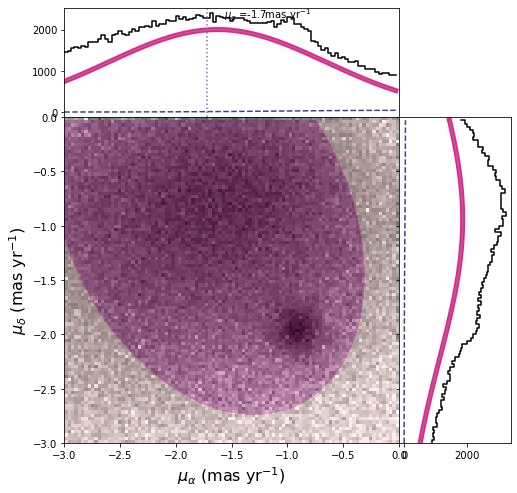

In [64]:
# The default fitter
NGC7789.getPMMembers()

In [67]:
x = NGC7789.data['pmra']#*np.cos(NGC7789.data['dec']*np.pi/180.)
y = NGC7789.data['pmdec']

#1D histograms (use the members here)          
pmRAbins = np.linspace(NGC7789.PMxmin, NGC7789.PMxmax, NGC7789.PMxbins)
pmDecbins = np.linspace(NGC7789.PMymin, NGC7789.PMymax, NGC7789.PMybins)
hx1D, x1D = np.histogram(x, bins=pmRAbins)
hy1D, y1D = np.histogram(y, bins=pmDecbins)

#2D histogram
h2D, x2D, y2D = np.histogram2d(x, y, bins=[NGC7789.PMxbins, NGC7789.PMybins], \
                               range=[[NGC7789.PMxmin, NGC7789.PMxmax], [NGC7789.PMymin, NGC7789.PMymax]])

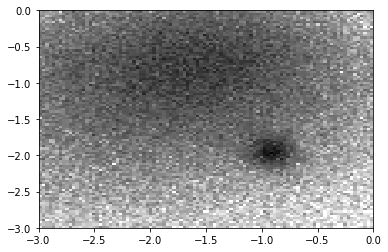

In [68]:
f, ax = plt.subplots()
_ = ax.hist2d(x, y, bins=[NGC7789.PMxbins, NGC7789.PMybins],\
   range=[[NGC7789.PMxmin, NGC7789.PMxmax], [NGC7789.PMymin, NGC7789.PMymax]], \
   norm = mplColors.LogNorm(), cmap = cm.Greys)

## Try fitting the field

C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\1020529735.py:47: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D_field(xf, yf).T, cmap=cm.RdPu, bins = 20, \


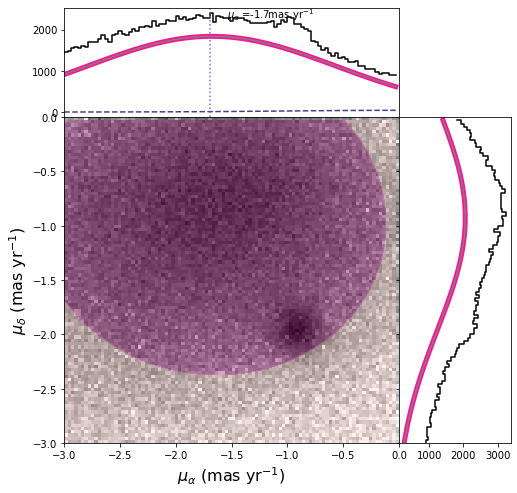

In [70]:
#fit
PMxguess = x1D[np.argmax(hx1D)]
PMyguess = y1D[np.argmax(hy1D)]

#####
# 2D Gaussian fit
p_init = models.Gaussian2D(np.max(h2D.flatten()), PMxguess, PMyguess, 5, 5)
####

#####
# 2D Sersic fit
#p_init = models.Sersic2D(amplitude = np.max(h2D.flatten()), r_eff = 5, n=4, x_0=PMxguess, y_0=PMyguess, ellip=.5, theta=-1)
#####

fit_p = NGC7789.fitter
xf, yf = np.meshgrid(x2D[:-1], y2D[:-1], indexing='ij')
pmG2D_field = fit_p(p_init, xf, yf, h2D)

# make the plot
f = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 2, height_ratios = [1, 3], width_ratios = [3, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

#histograms
hx1D, x1D = np.histogram(x, bins=pmRAbins)
ax1.step(x1D[:-1], hx1D, color='black')
ax1.plot(x2D[:-1], np.sum(pmG2D_field(xf, yf), axis=1), color='deeppink', lw=5)
foo = models.Gaussian2D(*pmG2D_field.parameters[0:6])
ax1.plot(x2D[:-1], np.sum(foo(xf, yf), axis=1), color='gray')
foo = models.Gaussian2D(*pmG2D_field.parameters[6:6])
ax1.plot(x2D[:-1], np.sum(foo(xf, yf), axis=1), color='darkslateblue', ls='dashed')
ax1.axvline(pmG2D_field.parameters[1], color='tab:purple', ls='dotted')
ax1.annotate(r'$\mu_\alpha$ =' + f'{pmG2D_field.parameters[1]:.1f}' + r'mas yr$^{-1}$', (pmG2D_field.parameters[1] + 0.05*(NGC7789.PMxmax - NGC7789.PMxmin), 0.95*max(hx1D)) )

hy1D, y1D = np.histogram(y, bins=pmDecbins)
ax3.step(hy1D, y1D[:-1], color='black')
ax3.plot(np.sum(pmG2D_field(xf, yf), axis=0), y2D[:-1], color='deeppink', lw=5)
foo = models.Gaussian2D(*pmG2D_field.parameters[0:6])
ax3.plot(np.sum(foo(xf, yf), axis=0), y2D[:-1], color='gray')

#heatmap
h2D, x2D, y2D, im = ax2.hist2d(x, y, bins=[NGC7789.PMxbins, NGC7789.PMybins],\
                               range=[[NGC7789.PMxmin, NGC7789.PMxmax], [NGC7789.PMymin, NGC7789.PMymax]], \
                               norm = mplColors.LogNorm(), cmap = cm.Greys)
ax2.contourf(x2D[:-1], y2D[:-1], pmG2D_field(xf, yf).T, cmap=cm.RdPu, bins = 20, \
             norm=mplColors.LogNorm(), alpha = 0.3)

ax1.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
ax3.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
#ax1.set_yscale("log")
#ax1.set_ylim(1, 2*max(hx1D))
#ax3.set_xscale("log")
#ax3.set_xlim(1, 2*max(hy1D))
#ax2.set_xlabel(r'$\mu_\alpha \cos(\delta)$ (mas yr$^{-1}$)', fontsize=16)
ax2.set_xlabel(r'$\mu_\alpha$ (mas yr$^{-1}$)', fontsize=16)
ax2.set_ylabel(r'$\mu_\delta$ (mas yr$^{-1}$)', fontsize=16)
plt.setp(ax1.get_yticklabels()[0], visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels()[0], visible=False)
f.subplots_adjust(hspace=0., wspace=0.)


In [71]:
pmG2D_field

<Gaussian2D(amplitude=27.02547461, x_mean=-1.69081675, y_mean=-0.92367262, x_stddev=1.12008624, y_stddev=1.0235278, theta=-0.21680712)>

## Subtract fit for the field off of the data

C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\2552439799.py:21: UserWarning: Log scale: values of z <= 0 have been masked
  ax2.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, bins = 20, \
C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\2552439799.py:21: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, bins = 20, \


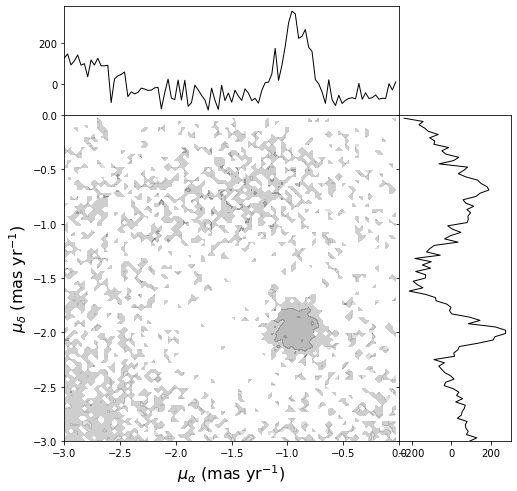

In [72]:
#h2D, x2D, y2D

# get the fit values in each bin
xf, yf = np.meshgrid(x2D[:-1], y2D[:-1], indexing='ij')
field_values = pmG2D_field(xf, yf).T

subtracted_data = h2D - pmG2D_field(xf, yf)

# make the plot
f = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 2, height_ratios = [1, 3], width_ratios = [3, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

#histograms
ax1.plot(x2D[:-1], np.sum(subtracted_data, axis=1), color='black', lw=1)
ax3.plot(np.sum(subtracted_data, axis=0), y2D[:-1], color='black', lw=1)

#heatmap
ax2.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, bins = 20, \
             norm=mplColors.LogNorm(), alpha = 0.3)

ax1.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
ax3.set_ylim(NGC7789.PMymin, NGC7789.PMymax)

ax2.set_xlabel(r'$\mu_\alpha$ (mas yr$^{-1}$)', fontsize=16)
ax2.set_ylabel(r'$\mu_\delta$ (mas yr$^{-1}$)', fontsize=16)
plt.setp(ax1.get_yticklabels()[0], visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels()[0], visible=False)
f.subplots_adjust(hspace=0., wspace=0.)

## Try fitting the remaining data as the cluster

C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\1490675032.py:35: UserWarning: Log scale: values of z <= 0 have been masked
  ax2.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, bins = 20, \
C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\1490675032.py:35: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, bins = 20, \


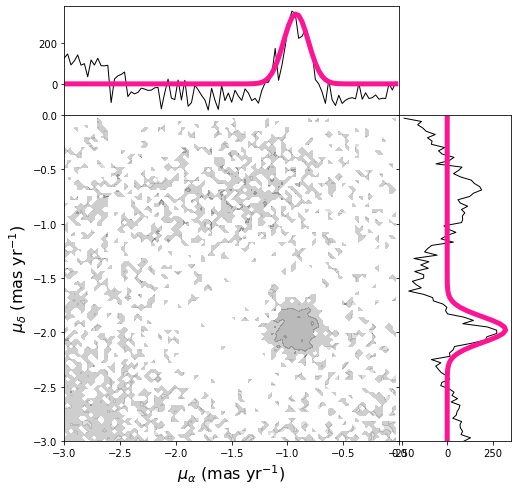

In [73]:
#fit
PMxguess = NGC7789.PMmean[0]
PMyguess = NGC7789.PMmean[1]

#####
# 2D Gaussian fit
p_init = models.Gaussian2D(np.max(subtracted_data.flatten()), PMxguess, PMyguess, 1, 1)
####

#####
# 2D Sersic fit
#p_init = models.Sersic2D(amplitude = np.max(subtracted_data.flatten()), r_eff = 5, n=4, x_0=PMxguess, y_0=PMyguess, ellip=.5, theta=-1)
#####

fit_p = NGC7789.fitter
xf, yf = np.meshgrid(x2D[:-1], y2D[:-1], indexing='ij')
pmG2D_cluster = fit_p(p_init, xf, yf, subtracted_data)


# make the plot
f = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 2, height_ratios = [1, 3], width_ratios = [3, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

#histograms
ax1.plot(x2D[:-1], np.sum(subtracted_data, axis=1), color='black', lw=1)
ax1.plot(x2D[:-1], np.sum(pmG2D_cluster(xf, yf), axis=1), color='deeppink', lw=5)

ax3.plot(np.sum(subtracted_data, axis=0), y2D[:-1], color='black', lw=1)
ax3.plot(np.sum(pmG2D_cluster(xf, yf), axis=0), y2D[:-1], color='deeppink', lw=5)

#heatmap
ax2.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, bins = 20, \
             norm=mplColors.LogNorm(), alpha = 0.3)
# ax2.contourf(x2D[:-1], y2D[:-1], pmG2D_cluster(xf, yf).T, cmap=cm.RdPu, bins = 20, \
#              norm=mplColors.LogNorm(), alpha = 0.3)

ax1.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
ax3.set_ylim(NGC7789.PMymin, NGC7789.PMymax)

ax2.set_xlabel(r'$\mu_\alpha$ (mas yr$^{-1}$)', fontsize=16)
ax2.set_ylabel(r'$\mu_\delta$ (mas yr$^{-1}$)', fontsize=16)
plt.setp(ax1.get_yticklabels()[0], visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels()[0], visible=False)
f.subplots_adjust(hspace=0., wspace=0.)




In [62]:
pmG2D_cluster

<Gaussian2D(amplitude=10.17522487, x_mean=-1.1739946, y_mean=-2.30454508, x_stddev=0., y_stddev=0.7845114, theta=38.526776)>

In [60]:
np.max(subtracted_data.flatten())

296.78309449033907

## Try writing a single function for this

C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\2272790678.py:76: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2_field.contourf(x2D[:-1], y2D[:-1], pmG2D_field(xf, yf).T, cmap=cm.RdPu, bins = 20, \
C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\2272790678.py:104: UserWarning: Log scale: values of z <= 0 have been masked
  ax2_cluster.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, norm=mplColors.LogNorm(), alpha = 0.3)
C:\Users\ageller\AppData\Local\Temp\ipykernel_10428\2272790678.py:105: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2_cluster.contourf(x2D[:-1], y2D[:-1], pmG2D_cluster(xf, yf).T, cmap=cm.RdPu, bins = 20, \


[None, None]

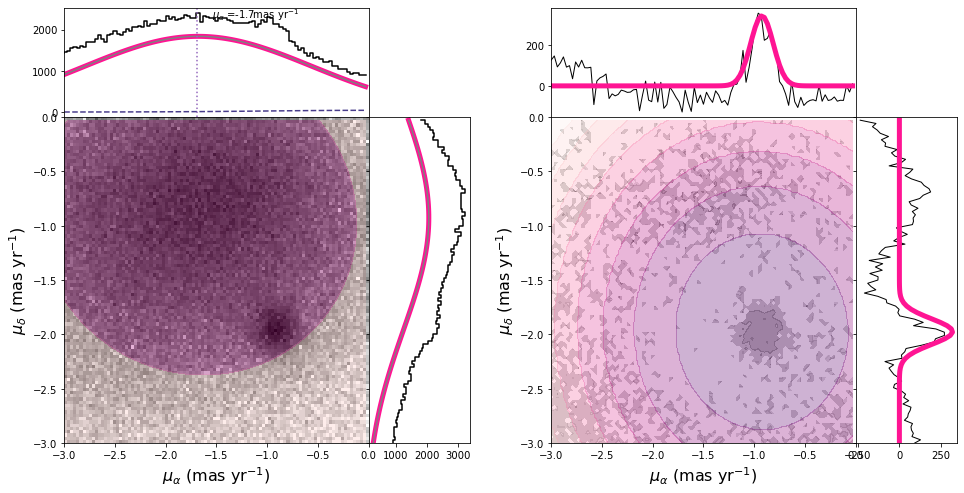

In [87]:
x = NGC7789.data['pmra']#*np.cos(NGC7789.data['dec']*np.pi/180.)
y = NGC7789.data['pmdec']

#1D histograms (use the members here)          
pmRAbins = np.linspace(NGC7789.PMxmin, NGC7789.PMxmax, NGC7789.PMxbins)
pmDecbins = np.linspace(NGC7789.PMymin, NGC7789.PMymax, NGC7789.PMybins)
hx1D, x1D = np.histogram(x, bins=pmRAbins)
hy1D, y1D = np.histogram(y, bins=pmDecbins)

#2D histogram
h2D, x2D, y2D = np.histogram2d(x, y, bins=[NGC7789.PMxbins, NGC7789.PMybins], \
                               range=[[NGC7789.PMxmin, NGC7789.PMxmax], [NGC7789.PMymin, NGC7789.PMymax]])

# for the fitter
fit_p = NGC7789.fitter
xf, yf = np.meshgrid(x2D[:-1], y2D[:-1], indexing='ij')

##########
# Field
PMxguess = x1D[np.argmax(hx1D)]
PMyguess = y1D[np.argmax(hy1D)]

p_init = models.Gaussian2D(np.max(h2D.flatten()), PMxguess, PMyguess, 5, 5)
pmG2D_field = fit_p(p_init, xf, yf, h2D)
##########

##########
# Subtracted data
# get the fit values in each bin
field_values = pmG2D_field(xf, yf).T
subtracted_data = h2D - pmG2D_field(xf, yf)
##########


#########
# Cluster as subtracted data
PMxguess = NGC7789.PMmean[0]
PMyguess = NGC7789.PMmean[1]

p_init = models.Gaussian2D(np.max(subtracted_data.flatten()), PMxguess, PMyguess, 1, 1)

pmG2D_cluster = fit_p(p_init, xf, yf, subtracted_data)

# make the plots
# make 
f = plt.figure(figsize=(16, 8)) 
gs0 = gridspec.GridSpec(1, 2, figure=f)

gs_field = gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios = [1, 3], width_ratios = [3, 1], subplot_spec=gs0[0], hspace=0, wspace=0)
ax1_field = plt.subplot(gs_field[0])
ax2_field = plt.subplot(gs_field[2])
ax3_field = plt.subplot(gs_field[3])

###### for the field
#histograms
hx1D, x1D = np.histogram(x, bins=pmRAbins)
ax1_field.step(x1D[:-1], hx1D, color='black')
ax1_field.plot(x2D[:-1], np.sum(pmG2D_field(xf, yf), axis=1), color='deeppink', lw=5)
foo = models.Gaussian2D(*pmG2D_field.parameters[0:6])
ax1_field.plot(x2D[:-1], np.sum(foo(xf, yf), axis=1), color='gray')
foo = models.Gaussian2D(*pmG2D_field.parameters[6:6])
ax1_field.plot(x2D[:-1], np.sum(foo(xf, yf), axis=1), color='darkslateblue', ls='dashed')
ax1_field.axvline(pmG2D_field.parameters[1], color='tab:purple', ls='dotted')
ax1_field.annotate(r'$\mu_\alpha$ =' + f'{pmG2D_field.parameters[1]:.1f}' + r'mas yr$^{-1}$', (pmG2D_field.parameters[1] + 0.05*(NGC7789.PMxmax - NGC7789.PMxmin), 0.95*max(hx1D)) )

hy1D, y1D = np.histogram(y, bins=pmDecbins)
ax3_field.step(hy1D, y1D[:-1], color='black')
ax3_field.plot(np.sum(pmG2D_field(xf, yf), axis=0), y2D[:-1], color='deeppink', lw=5)
foo = models.Gaussian2D(*pmG2D_field.parameters[0:6])
ax3_field.plot(np.sum(foo(xf, yf), axis=0), y2D[:-1], color='gray')

#heatmap
h2D, x2D, y2D, im = ax2_field.hist2d(x, y, bins=[NGC7789.PMxbins, NGC7789.PMybins],\
                               range=[[NGC7789.PMxmin, NGC7789.PMxmax], [NGC7789.PMymin, NGC7789.PMymax]], \
                               norm = mplColors.LogNorm(), cmap = cm.Greys)
ax2_field.contourf(x2D[:-1], y2D[:-1], pmG2D_field(xf, yf).T, cmap=cm.RdPu, bins = 20, \
             norm=mplColors.LogNorm(), alpha = 0.3)

ax1_field.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2_field.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2_field.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
ax3_field.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
ax2_field.set_xlabel(r'$\mu_\alpha$ (mas yr$^{-1}$)', fontsize=16)
ax2_field.set_ylabel(r'$\mu_\delta$ (mas yr$^{-1}$)', fontsize=16)
plt.setp(ax1_field.get_yticklabels()[0], visible=False)
plt.setp(ax1_field.get_xticklabels(), visible=False)
plt.setp(ax3_field.get_yticklabels(), visible=False)
plt.setp(ax3_field.get_xticklabels()[0], visible=False)


###### for the cluster
gs_cluster = gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios = [1, 3], width_ratios = [3, 1], subplot_spec=gs0[1], hspace=0, wspace=0)
ax1_cluster = plt.subplot(gs_cluster[0])
ax2_cluster = plt.subplot(gs_cluster[2])
ax3_cluster = plt.subplot(gs_cluster[3])

#histograms
ax1_cluster.plot(x2D[:-1], np.sum(subtracted_data, axis=1), color='black', lw=1)
ax1_cluster.plot(x2D[:-1], np.sum(pmG2D_cluster(xf, yf), axis=1), color='deeppink', lw=5)
ax3_cluster.plot(np.sum(subtracted_data, axis=0), y2D[:-1], color='black', lw=1)
ax3_cluster.plot(np.sum(pmG2D_cluster(xf, yf), axis=0), y2D[:-1], color='deeppink', lw=5)

#heatmap
ax2_cluster.contourf(x2D[:-1], y2D[:-1], subtracted_data.T, cmap=cm.Greys, norm=mplColors.LogNorm(), alpha = 0.3)
ax2_cluster.contourf(x2D[:-1], y2D[:-1], pmG2D_cluster(xf, yf).T, cmap=cm.RdPu, bins = 20, \
             norm=mplColors.LogNorm(), alpha = 0.3)

ax1_cluster.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2_cluster.set_xlim(NGC7789.PMxmin, NGC7789.PMxmax)
ax2_cluster.set_ylim(NGC7789.PMymin, NGC7789.PMymax)
ax3_cluster.set_ylim(NGC7789.PMymin, NGC7789.PMymax)

ax2_cluster.set_xlabel(r'$\mu_\alpha$ (mas yr$^{-1}$)', fontsize=16)
ax2_cluster.set_ylabel(r'$\mu_\delta$ (mas yr$^{-1}$)', fontsize=16)
plt.setp(ax1_cluster.get_yticklabels()[0], visible=False)
plt.setp(ax1_cluster.get_xticklabels(), visible=False)
plt.setp(ax3_cluster.get_yticklabels(), visible=False)
plt.setp(ax3_cluster.get_xticklabels()[0], visible=False)
                                            
                                            
                                            
#f.subplots_adjust(hspace=0., wspace=0.)

finding proper-motion members with two steps...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:386: UserWarning: The following kwargs were not used by contour: 'bins'
  self.PPM = Fc(x,y)/pmG2D(x,y)
C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:414: UserWarning: Log scale: values of z <= 0 have been masked
  #members
C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:415: UserWarning: The following kwargs were not used by contour: 'bins'
  mask = (data[m] > self.membershipMin)
C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:432: RuntimeWarning: invalid value encountered in true_divide
  # take only those that pass the membership threshold


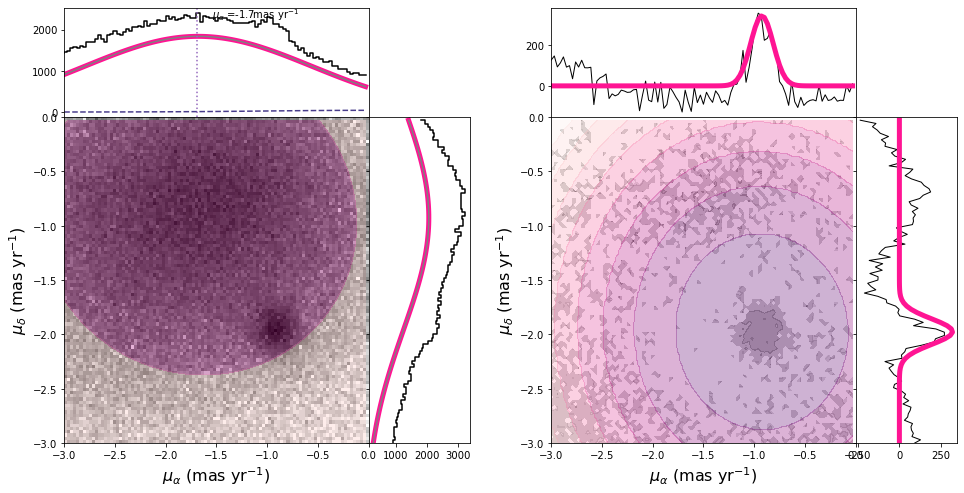

In [88]:
# The new fitter
NGC7789.getPMMembers2Step()